#### Importing Libraries

In [1]:
import pandas as pd 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib.pyplot import figure
from sklearn import tree
from matplotlib import pyplot as plt

#### Reading Data

In [2]:
data = pd.read_csv("./Final-Database.csv")

<h4> Data Description </h4>
<h6> Youtube DataSet</h6>

##### Data Columns

In [3]:
data.columns

Index(['Video_Title', 'Title_characters', 'Channel_title', 'Publish_date',
       'day of the week', 'Day', 'Time', 'time-part', 'Time_Category',
       'publish_time', 'views', 'tags', 'Tag_words', 'No. Of Charcters (Tags)',
       'T/NT', 'likes', 'dislikes', 'comment_count', 'Comment Disabled',
       'Description'],
      dtype='object')

In [4]:
data.head()

,Video_Title,Title_characters,Channel_title,Publish_date,day of the week,Day,Time,time-part,Time_Category,publish_time,views,tags,Tag_words,No. Of Charcters (Tags),T/NT,likes,dislikes,comment_count,Comment Disabled,Description
0,10 DIY Giant vs Miniature Gadgets / School Pra...,50,Troom Troom,5/27/18,Sunday,1,14:00:09,14,2,2018-05-27T14:00:09.000Z,1270168,prank pranks best pranks funny joke how to pra...,59,362,1,20418,1410,2593,False,Subscribe Here: https://goo.gl/KM3Axw8 DIY Edi...
1,10th Annual Vijay Awards | 16th & 17th June 20...,58,Vijay Television,6/13/18,Wednesday,4,6:38:30,6,1,2018-06-13T06:38:30.000Z,540577,Thamizh Vijay Star Vijay TV Star TV Star Vijay...,40,245,0,4382,397,224,False,10th Annual Vijay Awards! ஜூன் 16 இரவு 8 மணிக்...
2,11 AM Headlines || 04 June 2018 - OTV,37,OTV,6/4/18,Monday,2,5:55:54,5,4,2018-06-04T05:55:54.000Z,107275,otv otv news odisha news odisha latest news od...,23,137,0,636,40,10,False,OdishaTV is Odisha's no 1 News Channel. OTV be...
3,11 AWESOME LIFE HACKS!,22,Power Vision,6/5/18,Tuesday,3,13:00:01,13,2,2018-06-05T13:00:01.000Z,236406,Life hacks Kitchen Life hacks Lifehacks with G...,28,177,0,1404,293,95,False,Help Me +2.100.000 Subscribers: https://goo.gl...
4,11 June 2018 - The Hindu Editorial News Paper ...,88,Study IQ education,6/11/18,Monday,2,2:49:16,2,4,2018-06-11T02:49:16.000Z,64041,current affairs 2018 current affairs current a...,83,454,0,3479,68,487,False,#UPSC #SSC #IBPS #SBI #RBI #StatePSC #UGC #SSC...


In [5]:
data.shape

(4600, 20)

##### Checking is there any NULL values in data

In [6]:
data[data.isnull().any(axis = 1)].head()

,Video_Title,Title_characters,Channel_title,Publish_date,day of the week,Day,Time,time-part,Time_Category,publish_time,views,tags,Tag_words,No. Of Charcters (Tags),T/NT,likes,dislikes,comment_count,Comment Disabled,Description
59,8 DIY Edible Phone Cases / Edible Pranks!,41,Troom Troom,6/7/18,Thursday,5,19:00:03,19,3,2018-06-07T19:00:03.000Z,4381895,Edible Pranks Pranks DIY Edible Phone Cases Ed...,46,262,1,37020,4294,4012,False,NaN
106,ABP ANANDA Live Stream,22,ABP ANANDA,5/17/18,Thursday,5,6:39:03,6,1,2018-05-17T06:39:03.000Z,133305,[none],0,6,0,439,89,32,False,NaN
108,Abrahaminte Santhathikal Official Trailer | Ma...,96,GOODWILL ENTERTAINMENTS,6/6/18,Wednesday,4,15:02:34,15,2,2018-06-06T15:02:34.000Z,1282011,Abrahaminte Santhathikal Abrahaminte Santhathi...,52,466,0,61242,3126,7325,False,NaN
227,Allu Arjun Movie in Hindi Dubbed 2017 | Hindi ...,75,Blockbuster Movies,1/28/18,Sunday,1,7:00:04,7,1,2018-01-28T07:00:04.000Z,640705,[none],1,6,0,1645,297,63,False,NaN
243,Ama Ghara Laxmi | Full Ep 503 16th Dec 2017 | ...,68,Tarang TV,12/16/17,Saturday,7,14:03:48,14,2,2017-12-16T14:03:48.000Z,64346,tarang tarang tv tarang tv online tarang ...,39,249,0,257,31,14,False,NaN


<h5> Data Cleaning </h5>

In [7]:
data = data.dropna()

In [8]:
data.shape

(4512, 20)

In [9]:
# For creating additional feature -> Trending-NonTrending
dataframe = data.copy()

# Defining our Target Variable/feature
dataframe['Trending_NonTrending'] = (dataframe['views'] > 400000) * 1
dataframe['Trending_NonTrending'].head()

0    1
1    1
2    0
3    0
4    0
Name: Trending_NonTrending, dtype: int32

In [10]:
# Creating Target Variable 
Y = dataframe['Trending_NonTrending'].copy()
Y.head()

0    1
1    1
2    0
3    0
4    0
Name: Trending_NonTrending, dtype: int32

In [11]:
features_list = ['likes', 'views','dislikes','comment_count','Title_characters','Tag_words','Day','Time_Category']

X = dataframe[features_list].copy()
X.columns

Index(['likes', 'views', 'dislikes', 'comment_count', 'Title_characters',
       'Tag_words', 'Day', 'Time_Category'],
      dtype='object')

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 324)

[Text(0.5, 0.75, 'views <= 400133.5\ngini = 0.415\nsamples = 3158\nvalue = [2230, 928]\nclass = Trending'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2230\nvalue = [2230, 0]\nclass = Trending'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 928\nvalue = [0, 928]\nclass = Non-Trending')]

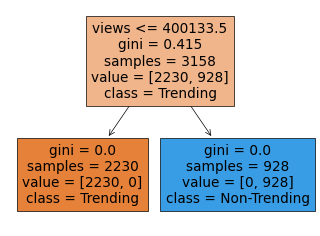

In [14]:
video_classifier = DecisionTreeClassifier(max_leaf_nodes = 10, random_state = 1234)
video_classifier = video_classifier.fit(x_train, y_train)

target_list = ["Trending", "Non-Trending"]

fig = figure(figsize=(8, 6), dpi = 50)
tree.plot_tree(video_classifier, feature_names = features_list, class_names = target_list, filled = True)

In [16]:
y_prediction = video_classifier.predict(x_test)
accuracy_score(y_test, y_prediction)*100

100.0

In [17]:
confusion_matrix(y_test, y_prediction)

array([[979,   0],
       [  0, 375]], dtype=int64)